## Accessing Planet - NICFI Data on the Planetary Computer

We've partnered with the [Group on Earth Observation](https://www.earthobservations.org/geo_blog_obs.php?id=528) and [Planet](https://www.planet.com/pulse/nicfi-satellite-data-program-extended-to-include-recipients-of-the-geo-microsoft-planetary-computer-grants-program/) to provide access to data from the NICFI Satellite Data Program to winners of the GEO - Microsoft Planetary Computer grants program. Data from these collections are only available to the grantees. Others wishing to use the data can sign up and access it from Planet at https://www.planet.com/nicfi/.

In this example, we'll use the STAC API to search for items matching some spatio-temporal query.

In [1]:
import pystac_client

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1"
)

point = {"type": "Point", "coordinates": (-60.556640599999994, -0.96674985)}
search = catalog.search(collections=["planet-nicfi-visual"], intersects=point)
items = search.get_all_items()
len(items)

24

The STAC metadata is public, but downloading the assets requires signing the asset URLs. The `planetary-computer` package does this automatically. See [using tokens for data access](https://planetarycomputer.microsoft.com/docs/concepts/sas/) for more.

In [2]:
import planetary_computer

signed_items = sorted(planetary_computer.sign(items), key=lambda x: x.datetime)

Once the items are signed, we can load the assets normally. For example, we'll load the most oldest and most recent items to visually compare the change in this area over the six years.

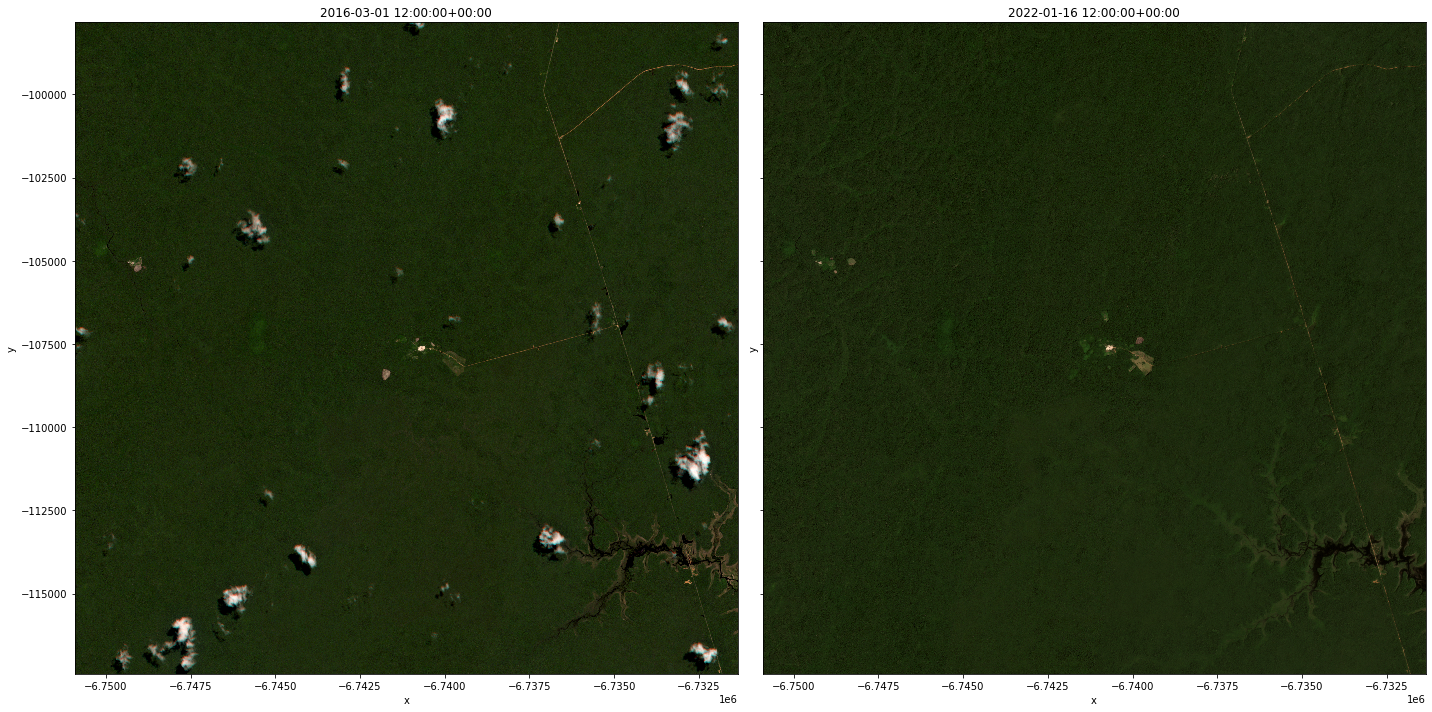

In [3]:
import rioxarray
import matplotlib.pyplot as plt

a = rioxarray.open_rasterio(signed_items[0].assets["data"].href)
b = rioxarray.open_rasterio(signed_items[-1].assets["data"].href)

fig, axes = plt.subplots(figsize=(20, 10), ncols=2, sharex=True, sharey=True)

a.plot.imshow(ax=axes[0], rgb="band")
axes[0].set(title=signed_items[0].datetime)

b.plot.imshow(ax=axes[1], rgb="band")
axes[1].set(title=signed_items[-1].datetime)
plt.tight_layout();

An analytic product is also available, which includes a near-infrared band.

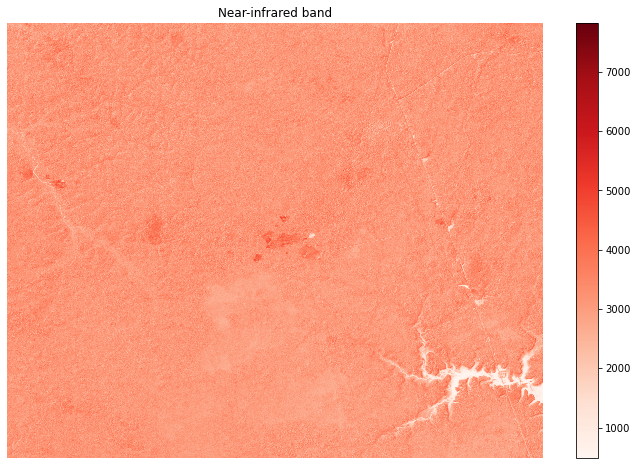

In [4]:
search = catalog.search(collections=["planet-nicfi-analytic"], intersects=point)
items = search.get_all_items()

item = planetary_computer.sign(items[0])

mesh = (
    rioxarray.open_rasterio(item.assets["data"].href)
    .sel(band=4)
    .plot(cmap="Reds", size=8)
)
mesh.axes.set_axis_off()
mesh.axes.set(title="Near-infrared band");